In [2]:
import numpy as np
import pandas as pd
import itertools

from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
data = np.array([49,58,75,110,112,132,151,276,281,362])

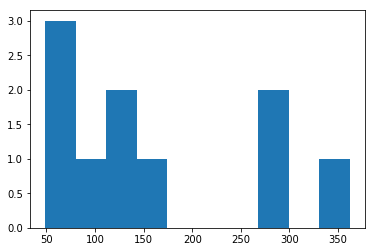

In [5]:
pylab.hist(data)
pylab.show()

In [6]:
m0 = 200
stats.wilcoxon(data - m0)

WilcoxonResult(statistic=17.0, pvalue=0.2845026979112075)

In [7]:
data1 = np.array([22,22,15,13,19,19,18,20,21,13,13,15])
data2 = np.array([17,18,18,15,12,4,14,15,10])

In [8]:
stats.mannwhitneyu(data1,data2)

MannwhitneyuResult(statistic=27.0, pvalue=0.02900499272087373)

In [14]:
X = pd.read_csv('challenger.txt' ,'\t')

In [15]:
X.head()

,Unnamed: 0,Temperature,Incident
0,Apr12.81,18.9,0
1,Nov12.81,21.1,1
2,Mar22.82,20.6,0
3,Nov11.82,20.0,0
4,Apr04.83,19.4,0


In [11]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [17]:
data_1 = X[X['Incident'] == 0]

In [18]:
data_2 = X[X['Incident'] == 1]

In [37]:
np.random.seed(0)
negative = get_bootstrap_samples(data_1['Temperature'].values, 1000)
positive = get_bootstrap_samples(data_2['Temperature'].values, 1000)

In [38]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [51]:
stat_intervals(negative.mean(axis = 1) - positive.mean(axis=1), 0.05)

array([1.42299107, 7.93861607])

In [47]:
data_1['Temperature'].shape

(16L,)